## Least-Squares Filter Design


In [1]:
# # Uncomment the following lines to run the notebook in the root directory of the repository
# import os

# # set the current working directory
# curr_path = os.getcwd().split("/")[:-2]
# curr_path = "/".join(curr_path)
# os.chdir(curr_path)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from pytspl import load_dataset, SCPlot

# load the paper dataset
sc, coordinates, _ = load_dataset("paper")

# create the SCPlot object
scplot = SCPlot(sc, coordinates)

Num. of nodes: 7
Num. of edges: 10
Num. of triangles: 3
Shape: (7, 10, 3)
Max Dimension: 2
Coordinates: 7
Flow: 10


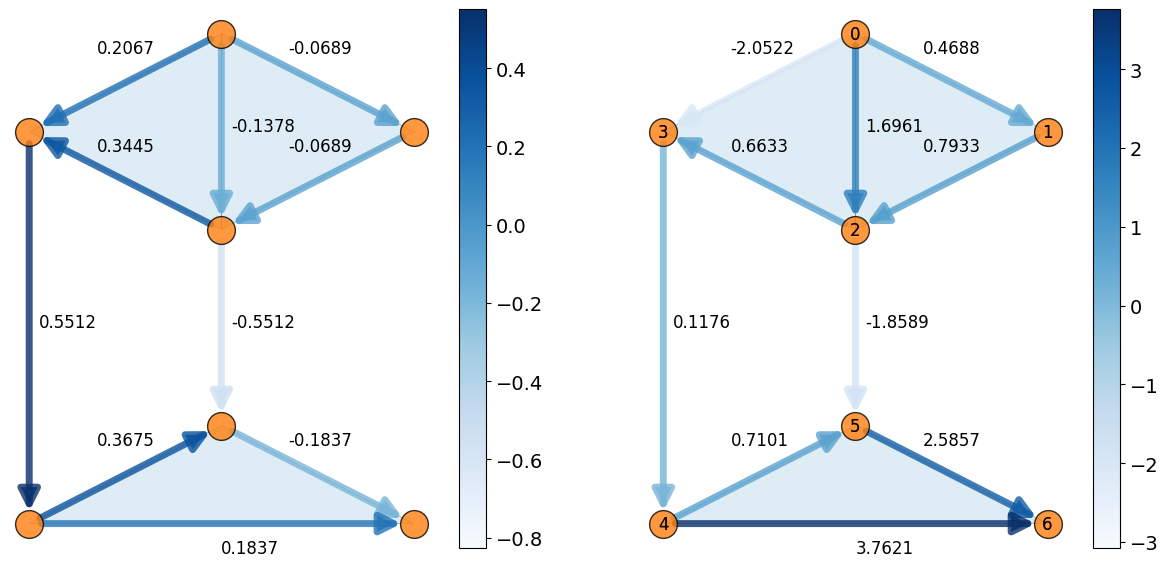

In [5]:
f0 = np.array([-0.0689, -0.1378, 0.2067, -0.0689, 0.3445, -0.5512, 0.5512, 0.3675, 0.1837, -0.1837])
f = np.array([0.4688, 1.6961, -2.0522, 0.7933, 0.6633, -1.8589, 0.1176, 0.7101, 3.7621, 2.5857])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

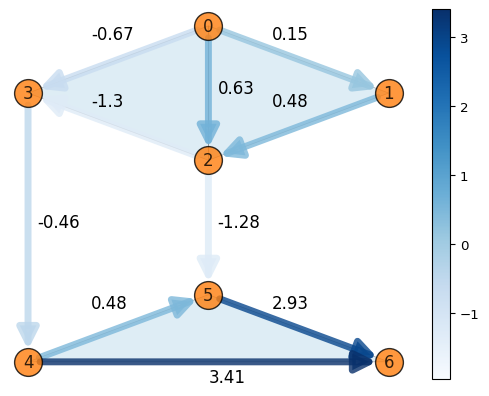

In [6]:
f_g = sc.get_component_flow(flow=f, component="gradient", round_fig=False)
f_c = sc.get_component_flow(flow=f, component="curl", round_fig=False)
scplot.draw_network(edge_flow=np.round(f_g, 2))

In [7]:
from pytspl.filters import LSFilterDesign

# initialize the LSFilterDesign object
lsfilter = LSFilterDesign(simplicial_complex=sc)

### Subcomponent extraction type I - L1 = L2 = L and α = β

Filter size: 0 - Error: 0.524945436142384
Filter size: 1 - Error: 0.4745316141475573
Filter size: 2 - Error: 0.4813689649192828
Filter size: 3 - Error: 0.5048527418565079
Filter size: 4 - Error: 0.5367322722675453
Filter size: 5 - Error: 0.501323719478616
Filter size: 6 - Error: 0.43446533580113794
Filter size: 7 - Error: 0.434893777609871
Filter size: 8 - Error: 0.1329682052896872
Filter size: 9 - Error: 2.5333547492095437e-07


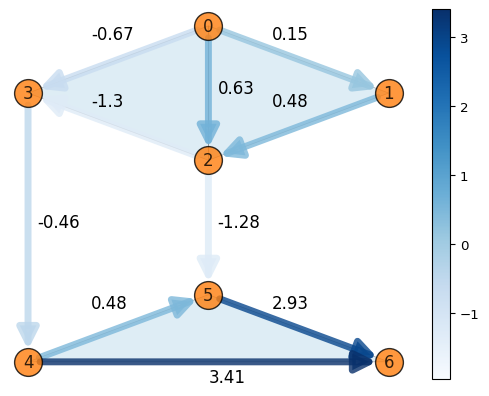

In [8]:
filter_size = 10

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)

f_estimated = lsfilter.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

Filter size: 0 - Error: 0.524945436142384
Filter size: 1 - Error: 0.4745316141475573
Filter size: 2 - Error: 0.4813689649192828
Filter size: 3 - Error: 0.5048527418565044
Filter size: 4 - Error: 0.5367322722675282
Filter size: 5 - Error: 0.5013237194787354
Filter size: 6 - Error: 0.4344653357995336
Filter size: 7 - Error: 0.43489377761765147
Filter size: 8 - Error: 0.13296820593041672
Filter size: 9 - Error: 8.668133414444225e-07
Filter size: 10 - Error: 4.3712966959212745e-07
Filter size: 11 - Error: 5.784915593827474e-07
Filter size: 12 - Error: 1.3497205012752157e-06
Filter size: 13 - Error: 6.524880504927783e-07
Filter size: 14 - Error: 9.146275067379797e-07
Filter size: 15 - Error: 4.948092611151392e-06
Filter size: 0 - Error: 0.9105007391498801
Filter size: 1 - Error: 0.9189324739856071
Filter size: 2 - Error: 0.9633681624628962
Filter size: 3 - Error: 0.9551408101375046
Filter size: 4 - Error: 0.9758580503794968
Filter size: 5 - Error: 0.9411818910684531
Filter size: 6 - Error: 

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

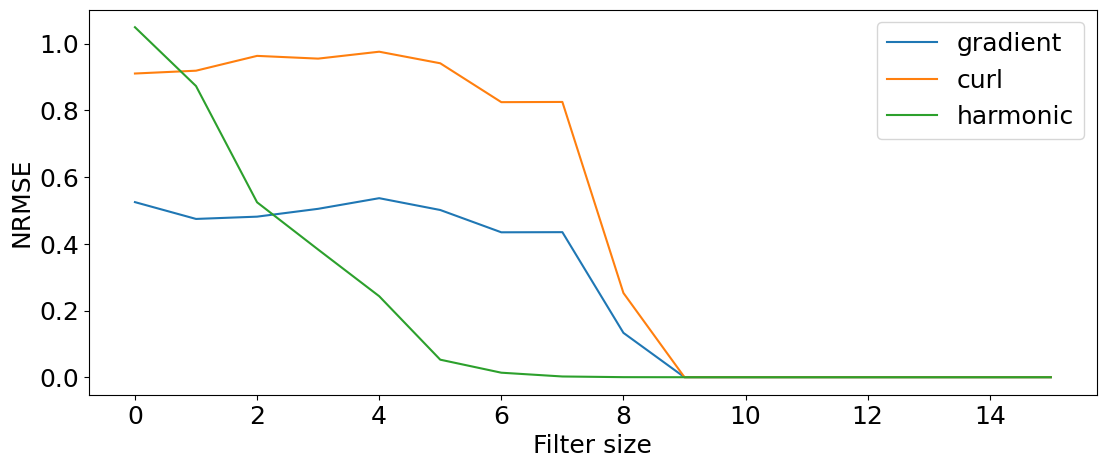

In [9]:
import matplotlib.pyplot as plt

filter_size = 16
plt.figure(figsize=(13, 5))

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="gradient")

# curl
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="curl", f=f,
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="curl")

# harmonic 
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="harmonic", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="harmonic")


# x-axis 
plt.xlabel("Filter size", fontsize=18)
# y-axis
plt.ylabel("NRMSE", fontsize=18)

plt.legend(fontsize=18)

# increase the font size of the ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

### Subcomponent extraction type II - L1 != L2 and α != β

Filter size: 0 - Error: 0.5062219222281088
Filter size: 1 - Error: 0.3123287994810451
Filter size: 2 - Error: 0.1767192105137419
Filter size: 3 - Error: 0.10394164592496641
Filter size: 4 - Error: 0.044693735009114
Filter size: 5 - Error: 0.0037452937925339493
Filter size: 6 - Error: 4.1374185474733776e-12
Filter size: 7 - Error: 7.439290207373576e-12
Filter size: 8 - Error: 4.1066582080050305e-11
Filter size: 9 - Error: 1.654736423781316e-10
Filter size: 10 - Error: 1.1332986674562834e-09
Filter size: 11 - Error: 5.054527854707582e-09
Filter size: 12 - Error: 4.4275047691916223e-08
Filter size: 13 - Error: 1.0518620150261055e-07
Filter size: 14 - Error: 1.1913602389975908e-06
Filter size: 15 - Error: 3.579717793043628e-06


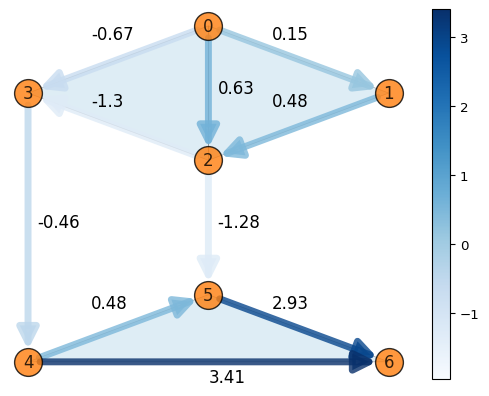

In [10]:
filter_range = 16

lsfilter.subcomponent_extraction_type_two(
    L=filter_range, component="gradient", f=f
)

f_estimated = lsfilter.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

### General Filter

Filter size: 0 - Error: 0.5062219222281088
Filter size: 0 - Error: 1.4769300846529563


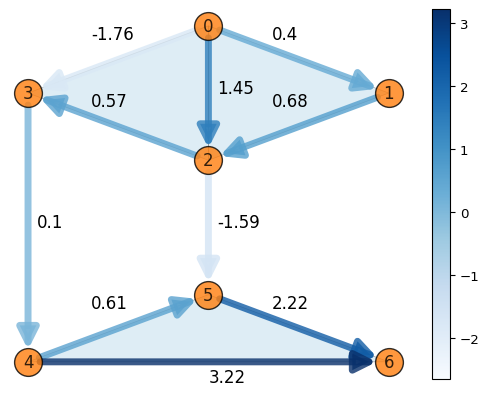

In [11]:
lsfilter = LSFilterDesign(simplicial_complex=sc)

f_est_h, f_est_c, f_est_g = lsfilter.general_filter(
    L1 = 1, L2 = 1, f=f,
)

scplot.draw_network(edge_flow=np.round(f_est_g, 2))

In [12]:
lsfilter.history

{'L1': {'filter': array([[0.85714286, 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.85714286, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.85714286, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.85714286, 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.85714286,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.85714286, 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.85714286, 0.        , 0.        , 0.        